In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv

In [2]:
df = pd.read_csv('dataset.csv')
df.head(10)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,238859078,01/09/2022,NaN,(null),NaN,(null),PL 2650022,M,B,49,0.0,25-44,M,BLACK HISPANIC,1021536.0,251417.0,40.856680,-73.865212,POINT (-73.865212 40.85668)
1,239923883,01/31/2022,NaN,(null),NaN,(null),CPL5700600,9,Q,113,3.0,25-44,M,BLACK,1046367.0,186986.0,40.679701,-73.776047,POINT (-73.77604735 40.67970059)
2,239651234,01/25/2022,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,K,71,0.0,25-44,M,BLACK,998742.0,181235.0,40.664121,-73.947765,POINT (-73.9477648403751 40.664121282631)
3,241524225,03/03/2022,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,84,0.0,18-24,M,BLACK,988902.0,192641.0,40.695439,-73.983225,POINT (-73.9832253756043 40.6954388081238)
4,241038267,02/22/2022,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,B,41,0.0,45-64,M,BLACK,1013037.0,236657.0,40.816206,-73.896001,POINT (-73.8960011932583 40.8162058439227)
5,240817075,02/17/2022,175.0,"SEXUAL ABUSE 3,2",233.0,SEX CRIMES,PL 13052A1,M,K,71,0.0,<18,M,BLACK,998742.0,181235.0,40.664121,-73.947765,POINT (-73.9477648403751 40.664121282631)
6,241964195,03/11/2022,157.0,RAPE 1,104.0,RAPE,PL 1303504,F,B,49,0.0,25-44,M,WHITE HISPANIC,1027434.0,251387.0,40.856577,-73.843894,POINT (-73.8438936779283 40.8565767275976)
7,242017376,03/13/2022,742.0,ESCAPE 3,237.0,ESCAPE 3,PL 2050500,M,B,46,0.0,<18,F,WHITE HISPANIC,1011625.0,251038.0,40.855675,-73.901040,POINT (-73.90104 40.855675)
8,243994388,04/21/2022,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0.0,25-44,M,BLACK,1003509.0,185018.0,40.674496,-73.930571,POINT (-73.9305713255961 40.6744956865259)
9,245888645,06/01/2022,464.0,JOSTLING,230.0,JOSTLING,PL 1652501,M,M,13,1.0,25-44,M,BLACK,984338.0,208351.0,40.738552,-73.999682,POINT (-73.99968244 40.73855195)


In [4]:
df.dropna(axis=0,how='any',subset=['Latitude','Longitude'],inplace=True)

In [5]:
X=df.loc[:,['ARREST_KEY','Latitude','Longitude']]
X.head(10)

,ARREST_KEY,Latitude,Longitude
0,238859078,40.856680,-73.865212
1,239923883,40.679701,-73.776047
2,239651234,40.664121,-73.947765
3,241524225,40.695439,-73.983225
4,241038267,40.816206,-73.896001
5,240817075,40.664121,-73.947765
6,241964195,40.856577,-73.843894
7,242017376,40.855675,-73.901040
8,243994388,40.674496,-73.930571
9,245888645,40.738552,-73.999682


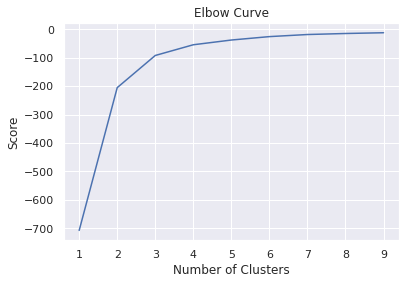

In [6]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df[['Latitude']]
X_axis = df[['Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [7]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.head(10)

,ARREST_KEY,Latitude,Longitude,cluster_label
0,238859078,40.856680,-73.865212,0
1,239923883,40.679701,-73.776047,1
2,239651234,40.664121,-73.947765,2
3,241524225,40.695439,-73.983225,2
4,241038267,40.816206,-73.896001,0
5,240817075,40.664121,-73.947765,2
6,241964195,40.856577,-73.843894,0
7,242017376,40.855675,-73.901040,0
8,243994388,40.674496,-73.930571,2
9,245888645,40.738552,-73.999682,2
